In [12]:
import os
import warnings
import pandas as pd
import seaborn as sns
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine learn packages
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras





In [13]:
url_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']

features = ['frequency','angle_of_attack', 
            'chord_length', 
            'free_stream_velocity',
            'suction_side_displacement_thickness']

airfoil_dataset = pd.read_csv(url_file, sep='\t', header=None, names=columns)

In [14]:
airfoil_dataset.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [15]:
airfoil_dataset.tail()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [16]:
airfoil_dataset.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [17]:
airfoil_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


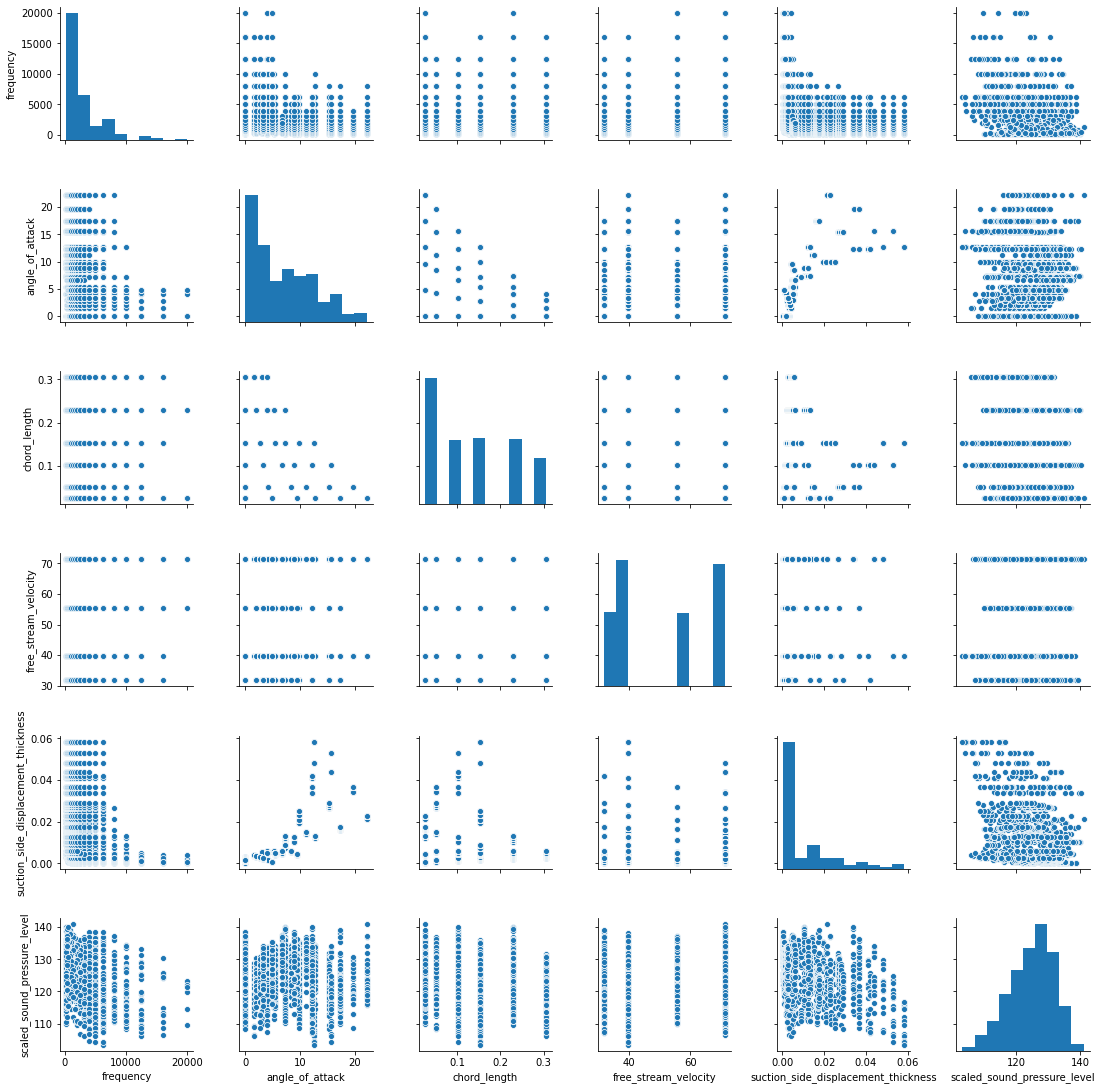

In [18]:
airfoil_plot = airfoil_dataset.copy()
sns.pairplot(airfoil_plot)

In [62]:
airfoil_plot["free_stream_velocity"].value_counts()

39.6    480
71.3    465
31.7    281
55.5    277
Name: free_stream_velocity, dtype: int64

In [20]:
airfoil_plot["chord_length"].value_counts()

0.0254    278
0.1524    271
0.2286    266
0.1016    263
0.0508    237
0.3048    188
Name: chord_length, dtype: int64

In [21]:
#Split features and targets

In [22]:
train_data = airfoil_dataset.copy()
train_set = train_data.drop("scaled_sound_pressure_level", axis = 1)
train_labels = train_data["scaled_sound_pressure_level"].copy()

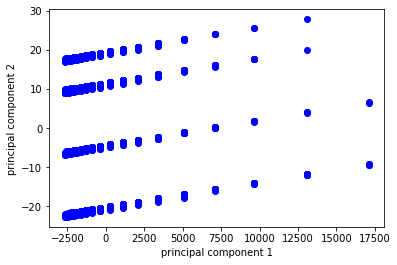

In [23]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_set)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, train_labels], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c='b', marker='o')

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')


plt.show()

In [32]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

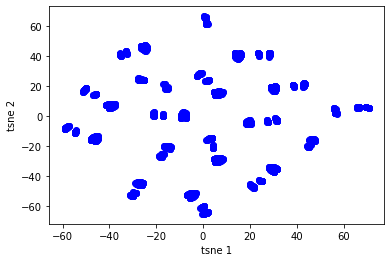

In [33]:
data_tsne = TSNE(random_state=10).fit_transform(train_set)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(data_tsne[:,0], data_tsne[:,1],  c='b', marker='o')

ax.set_xlabel('tsne 1')
ax.set_ylabel('tsne 2')


plt.show()

In [ ]:
#Choosing my model

In [34]:
train_set = QuantileTransformer(random_state=0).fit_transform(train_set)
train_set = MaxAbsScaler().fit_transform(train_set)
train_set = StandardScaler().fit_transform(train_set)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_set, 
                                                    train_labels, 
                                                    test_size=0.2)

In [36]:
def show_table(data):
    html = ['<link rel=\"stylesheet\" href=\"https://www.w3schools.com/w3css/4/w3.css\">',
            "<table class=\"w3-table-all\"> ",
            '<tr>',
            '<th>Model</th>',
            '<th>R2 score</th>',
            '<th>MSE score</th>',
            '</tr>']
    for row in data:
        key, r2, mse = row
        html.append("<tr>")
        html.append("<td>{0}</td>".format(key))
        html.append("<td>{0}</td>".format(r2))
        html.append("<td>{0}</td>".format(mse))
        html.append("</tr>")

    html.append("</table>")
    return html

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [scaled_sound_pressure_level]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$scaled_sound_pressure_level^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,40])
    plt.legend()
    plt.show()

In [37]:
#Machine learning models

In [38]:
class ModelEstimator():
    def __init__(self, models, parameters):
        self.models = models
        self.parameters = parameters

    def fit(self, X_train, X_test, y_train, y_test, cv=3, refit=True):
        results = []
        for key, model in self.models.items():
            current_parameter = self.parameters.get(key, {})
            gs = GridSearchCV(model, 
                              current_parameter,
                              cv=cv, 
                              scoring=None, 
                              refit=refit,
                              return_train_score=True)
            gs.fit(X_train, y_train)
            y_predict = gs.predict(X_test)

            results.append((key, r2_score(y_test, y_predict), mean_squared_error(y_test, y_predict)))
            
        return results

In [39]:
models_to_train = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'BayesianRidge': BayesianRidge(compute_score=True),
        'SVR': SVR()
    }

parameters_to_train = {
    'LinearRegression': {'fit_intercept': [True, False], 'normalize': [True, False]},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0, 0.1, 0.5, 1, 10, 100]},
    'BayesianRidge': {},
    'SVR': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['auto', 'scale']}   
}

train_estimator = ModelEstimator(models_to_train, parameters_to_train)
results = train_estimator.fit(X_train, X_test, y_train, y_test, cv=5)

In [40]:
#Neural network

In [41]:
model_activation = tf.nn.relu
model_kernel = keras.regularizers.l2(0.01)
layer_unit = 64


model = keras.Sequential([
    keras.layers.Flatten(input_shape=[5]),

    keras.layers.Dense(layer_unit, 
                       activation=model_activation, 
                       kernel_regularizer=model_kernel),
    
    keras.layers.Dense(layer_unit, 
                       activation=model_activation, 
                       kernel_regularizer=model_kernel),
    
    keras.layers.Dense(layer_unit, 
                       activation=model_activation, 
                       kernel_regularizer=model_kernel),
    
    keras.layers.Dense(layer_unit, 
                       activation=model_activation, 
                       kernel_regularizer=model_kernel),

    keras.layers.Dense(1)
])


model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history  = model.fit(X_train, y_train, epochs=500, validation_split = 0.2, verbose=0)

y_pred = model.predict(X_test).flatten()

results.append(('Neural network', r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)) )

In [42]:
html_results = show_table(results)
display(HTML(''.join(html_results)))

Model,R2 score,MSE score
LinearRegression,0.4365191571376976,29.577168260545093
Ridge,0.4360244035319222,29.603137928956887
Lasso,0.43553580319652185,29.628784611564384
ElasticNet,0.43553580319652185,29.628784611564384
BayesianRidge,0.43631262311573993,29.588009252916617
SVR,0.8196516030351106,9.466506182276062
Neural network,0.8133662874201237,9.796423054996662


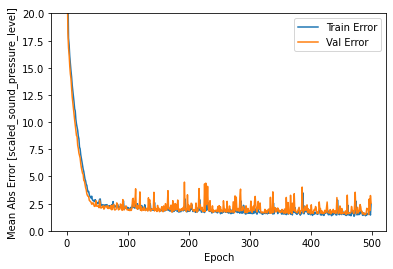

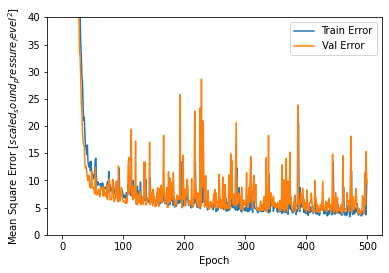

In [43]:
plot_history(history)

In [49]:
corelation = airfoil_dataset.corr('pearson')

In [51]:
corelation['scaled_sound_pressure_level'].sort_values()

frequency                             -0.390711
suction_side_displacement_thickness   -0.312670
chord_length                          -0.236162
angle_of_attack                       -0.156108
free_stream_velocity                   0.125103
scaled_sound_pressure_level            1.000000
Name: scaled_sound_pressure_level, dtype: float64

In [55]:
x1= airfoil_dataset['frequency']
x2 = airfoil_dataset['angle_of_attack']
x3 = airfoil_dataset['chord_length']
x4 = airfoil_dataset['free_stream_velocity']
x5 = airfoil_dataset['suction_side_displacement_thickness']
y = airfoil_dataset['scaled_sound_pressure_level']

Text(0.5, 0, 'angle_of_attack')

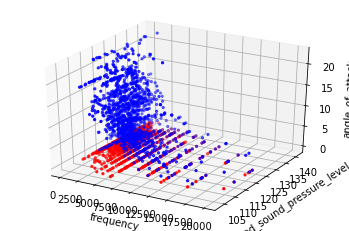

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,y,c='r',marker='.')
ax.scatter(x1,y,x2,c='b',marker='.')
ax.set_xlabel('frequency')
ax.set_ylabel('scaled_sound_pressure_level')
ax.set_zlabel('angle_of_attack')